<a href="https://colab.research.google.com/github/geduardo/Master-Thesis/blob/master/Simple_Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

ERROR: Operation cancelled by user


KeyboardInterrupt: ignored

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.utils import to_categorical
import numpy as np
import os
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import pydot
from IPython.display import SVG
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
from tensorflow import set_random_seed
set_random_seed(1)
import seaborn as sns

Using TensorFlow backend.


In [0]:
# First let's import the data
#Let's read the data from the .csv file
X = pd.read_csv("Box_Samples.csv", index_col=0)
y = pd.read_csv("Box_Masses.csv", index_col=0)
# #Spliting into train + test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

#Here we can check that all the dimensions are ok
print ("Number of training examples = " + str(X_train.shape[0]))
print ("Number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples = 8000
Number of test examples = 2000
X_train shape: (8000, 30)
y_train shape: (8000, 1)
X_test shape: (2000, 30)
y_test shape: (2000, 1)


In [0]:
# Let's standarize the data
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.fit_transform(X_test)

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(30, activation = 'relu', input_shape=[30]),
    layers.Dense(20, activation = 'relu'),
    layers.Dense(10, activation = 'relu'),
    layers.Dense(2, activation = 'relu' ),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [0]:
model = build_model()

In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_15 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 3         
Total params: 1,785
Trainable params: 1,785
Non-trainable params: 0
_________________________________________________________________


In [0]:
example_batch = X_train_std[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.09463385],
       [ 0.        ],
       [ 0.        ],
       [ 0.02546384],
       [ 0.05007068],
       [ 0.02097366],
       [ 0.07883903],
       [ 0.1723337 ],
       [-0.11422715],
       [ 0.05885962]], dtype=float32)

In [0]:
EPOCHS = 800
history = model.fit(
  X_train_std, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:282.7390,  mean_absolute_error:11.5381,  mean_squared_error:282.7389,  val_loss:12.4973,  val_mean_absolute_error:2.7662,  val_mean_squared_error:12.4973,  
....................................................................................................
Epoch: 100, loss:0.3410,  mean_absolute_error:0.4243,  mean_squared_error:0.3410,  val_loss:0.6346,  val_mean_absolute_error:0.6087,  val_mean_squared_error:0.6346,  
....................................................................................................
Epoch: 200, loss:0.2197,  mean_absolute_error:0.3418,  mean_squared_error:0.2197,  val_loss:0.1870,  val_mean_absolute_error:0.3284,  val_mean_squared_error:0.1870,  
....................................................................................................
Epoch: 300, loss:0.1874,  mean_absolute_error:0.3133,  mean_squared_error:0.1874,  val_loss:0.1219,  val_mean_absolute_error:0.2647,  val_mean_squared_error:0.1219,  
.......................

Text(0, 0.5, 'MAE [M box]')

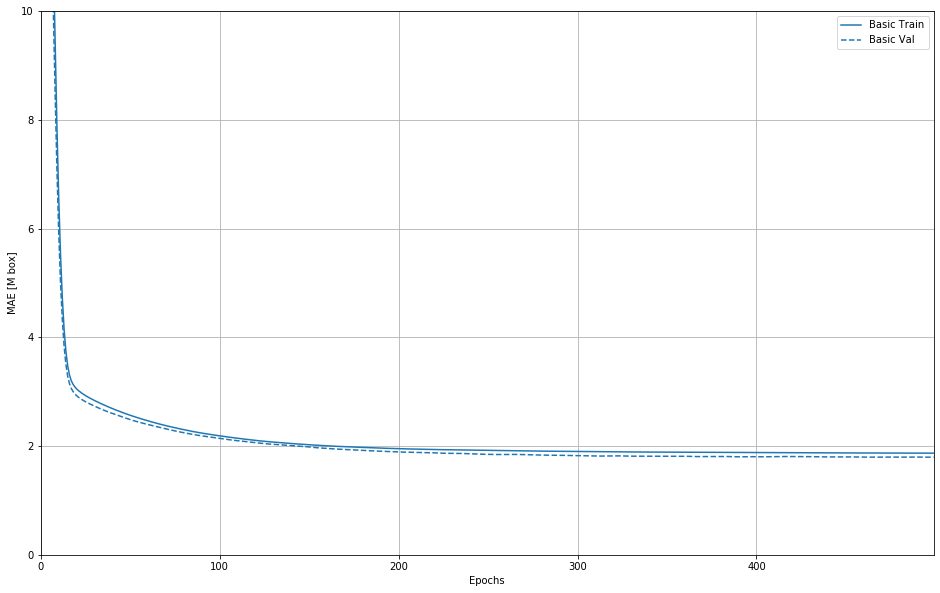

In [0]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric='mean_absolute_error')
plt.ylim([0, 10])
plt.ylabel('MAE [M box]')


Text(0, 0.5, 'MSE [M Box^2]')

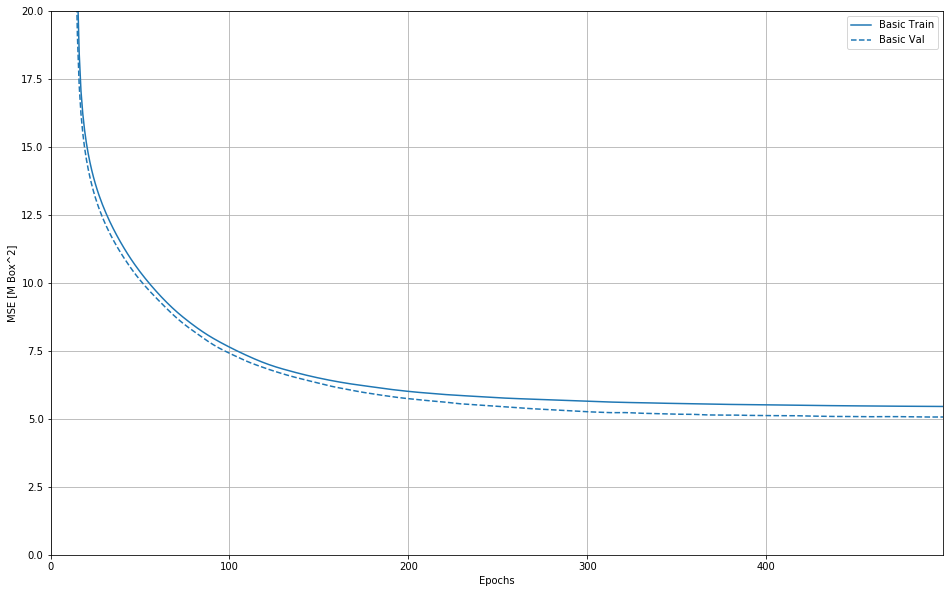

In [0]:
plotter.plot({'Basic': history}, metric = "mean_squared_error")
plt.ylim([0, 20])
plt.ylabel('MSE [M Box^2]')

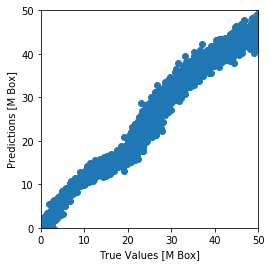

In [0]:
y_predictions = model.predict(X_test_std).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_predictions)
plt.xlabel('True Values [M Box]')
plt.ylabel('Predictions [M Box]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [0]:
X_new=np.array([ 4.        ,  3.        ,  2.60176991,  4.        ,  1.5       ,
         3.90049989,  4.        ,  1.5       ,  5.19708203,  4.        ,
         3.        ,  7.78169742,  4.        ,  1.5       ,  9.07187844,
         6.        ,  3.        , 14.85864716,  4.        ,  1.5       ,
        16.14248996,  4.        ,  3.        , 18.70179355,  4.        ,
         3.        , 21.25276969,  4.        ,  3.        , 23.79547239]
         )
mean=X_train.mean()
std=X_train.std()
X_new_std=(X_new-mean)/std
print(X_new_std.shape)
y_predictions = model.predict(( np.array( [X_new_std,] )))
y_predictions

(30,)


array([[64.57687]], dtype=float32)